In [33]:
%matplotlib inline

from __future__ import division
import numpy as np
import glob
from astropy import units as u
from astropy.coordinates import SkyCoord
#import healpy as hp
import matplotlib.pyplot as plt
import plot2
import ephem
from matplotlib.ticker import Formatter, FixedFormatter, FixedLocator
from matplotlib import text
import seaborn as sns


#from enterprise.pulsar import Pulsar

#from jupyterthemes import jtplot
#jtplot.style('chesterish')

#%config InlineBackend.figure_format = 'retina'

In [34]:
# # determine pulsar locations 
# datadir ='/Users/kpislo/Research/NANOGrav/nanograv_data/11yr/partim'
# parfiles = sorted(glob.glob(datadir + '/*.par'))
# timfiles = sorted(glob.glob(datadir + '/*.tim'))

# psrs = []
# for p, t in zip(parfiles, timfiles):
#     psrs.append(Pulsar(p, t))

# filename = '/Users/kpislo/Research/NANOGrav/nanograv_data/11yr/psr_pos.txt'

# with open(filename,'w') as f:
#     for p in psrs:
#         f.write('{0} {1} {2}\n'.format(p.name, p._raj, p._decj))
# f.close()	

# import data files (sessions A-D for P2780 Arecibo timing observations and all msps from Dunc's list are below)

psr_positions_a = np.loadtxt('/Users/Zach/Desktop/ARCC/nanograv_plots/Arecibo/ao_a_sess_nano_sources_12-2017.txt', usecols=(0,1))
psr_positions_b = np.loadtxt('/Users/Zach/Desktop/ARCC/nanograv_plots/Arecibo/ao_b_sess_nano_sources_12-2017.txt', usecols=(0,1))
psr_positions_c = np.loadtxt('/Users/Zach/Desktop/ARCC/nanograv_plots/Arecibo/ao_c_sess_nano_sources_12-2017.txt', usecols=(0,1))
psr_positions_d = np.loadtxt('/Users/Zach/Desktop/ARCC/nanograv_plots/Arecibo/ao_d_sess_nano_sources_12-2017.txt', usecols=(0,1))
psr_positions_msps = np.loadtxt('/Users/Zach/Desktop/ARCC/nanograv_plots/Arecibo/duncs_list_all_msps_excludeAOsessions_1-2018.txt', usecols=(0,1))

c_a = SkyCoord(ra=psr_positions_a[:,0]*u.degree, dec=psr_positions_a[:,1]*u.degree, frame='icrs')
c_b = SkyCoord(ra=psr_positions_b[:,0]*u.degree, dec=psr_positions_b[:,1]*u.degree, frame='icrs')
c_c = SkyCoord(ra=psr_positions_c[:,0]*u.degree, dec=psr_positions_c[:,1]*u.degree, frame='icrs')
c_d = SkyCoord(ra=psr_positions_d[:,0]*u.degree, dec=psr_positions_d[:,1]*u.degree, frame='icrs')
c_msps = SkyCoord(ra=psr_positions_msps[:,0]*u.degree, dec=psr_positions_msps[:,1]*u.degree, frame='icrs')

#print c_a.ra.radian, c_a.dec.radian
#print c_b.ra.radian, c_b.dec.radian
#print c_c.ra.radian, c_c.dec.radian
#print c_d.ra.radian, c_d.dec.radian
#print c_msps.ra.radian, c_msps.dec.radian


In [35]:
# load skymap
#h_upper = np.load('/home/jacob/Downloads/skymap_update_again_2.npy')

In [36]:
#Define galactic plane function

def plot_mwd(RA,Dec, org = 0, projection='astro mollweide'):
    ''' RA, Dec are arrays of the same length.
    RA takes values in [0,360), Dec in [-90,90],
    which represent angles in degrees.
    org is the origin of the plot, 0 or a multiple of 30 degrees in [0,360).
    title is the title of the figure.
    projection is the kind of projection: 'mollweide', 'aitoff', 'hammer', 'lambert'
    '''
    x = np.remainder(RA+360-org,360) # shift RA values
    ind = x>180
    x[ind] -=360    # scale conversion to [-180, 180]
    x=-x    
    x = SkyCoord(ra=RA*u.degree, dec=Dec*u.degree, frame='icrs')# reverse the scale: East to the left
    #tick_labels = np.array([150, 120, 90, 60, 30, 0, 330, 300, 270, 240, 210])
    #tick_labels = np.remainder(tick_labels+360+org,360)
#     fig = plt.figure(figsize=(10, 5))
#     ax = fig.add_subplot(111, projection=projection, axisbg ='LightCyan')
    ax.plot(x.ra.radian,x.dec.radian,
               color='k', linestyle='--', linewidth=2.25, label="Galactic plane", zorder=2)  
#     ax.set_xticklabels(tick_labels)     # we add the scale on the x axis
#     ax.set_title(title)
#     ax.title.set_fontsize(15)
#     ax.set_xlabel("RA")
#     ax.xaxis.label.set_fontsize(12)
#     ax.set_ylabel("Dec")
#     ax.yaxis.label.set_fontsize(12)
#     ax.grid(True)

In [37]:
# # Initialize a low-resolution HEALPix array
# nside = 4

# # Get sky locations of pixels
# idx = hp.pix2ang(nside, np.arange(0,len(h_upper)))
# #
# # set to angles of CW sources
# theta_h = idx[0]
# phi_h = idx[1]

# # CW search is parameterized in direction of GW propogation
# # Switch from source to origin via a parity transformation
# phi_h = np.pi + phi_h
# theta_h = np.pi - theta_h

# flipid = hp.ang2pix(nside, theta_h, phi_h)

In [38]:
# plotting function stolen from bayestar; modified so axes are sent back 

def outline_text(ax):
    """If we are using a new enough version of matplotlib, then
    add a white outline to all text to make it stand out from the background."""
    try:
        # Try to import matplotlib.patheffects (requires matplotlib 1.0+).
        from matplotlib import patheffects
    except ImportError:
        # If import failed, print a warning and do nothing.
        warnings.warn("This version of matplotlib does not support path effects.")
    else:
        # Otherwise, add the path effects.
        effects = [patheffects.withStroke(linewidth=2, foreground='w', zorder=2)]
        for artist in ax.findobj(text.Text):
            artist.set_path_effects(effects)
            

            

In [39]:
# plotting parameters to gussy things up a li'l

def figsize(scale):
    fig_width_pt = 513.17 #469.755    # Get this from LaTeX using \the\textwidth
    inches_per_pt = 1.0 / 72.27         # Convert pt to inch
    golden_mean = (np.sqrt(5.0)-1.0)/2.0    # Aesthetic ratio
    fig_width = fig_width_pt * inches_per_pt * scale  # width in inches
    fig_height = fig_width * golden_mean              # height in inches
    fig_size = [fig_width, fig_height]
    return fig_size
            

plt.rcParams.update(plt.rcParamsDefault)
params = {'backend': 'pdf',
    'axes.labelsize': 10,
        'lines.markersize': 4,
        'font.size': 10,
        'xtick.major.size':6,
        'xtick.minor.size':3,
        'ytick.major.size':6,
        'ytick.minor.size':3,
        'xtick.major.width':0.5,
        'ytick.major.width':0.5,
        'xtick.minor.width':0.5,
        'ytick.minor.width':0.5,
        'lines.markeredgewidth':1,
        'axes.linewidth':1.2,
        'legend.fontsize': 7,
        'xtick.labelsize': 10,
        'ytick.labelsize': 10,
        #'savefig.dpi':600,
        #'path.simplify':True,
        #'font.family': 'serif',
        #'font.serif':'Times',
        #'text.latex.preamble': [r'\usepackage{amsmath}'],
        #'text.usetex':True,
        'figure.figsize': figsize(1)}

#plt.rcParams.update(params)

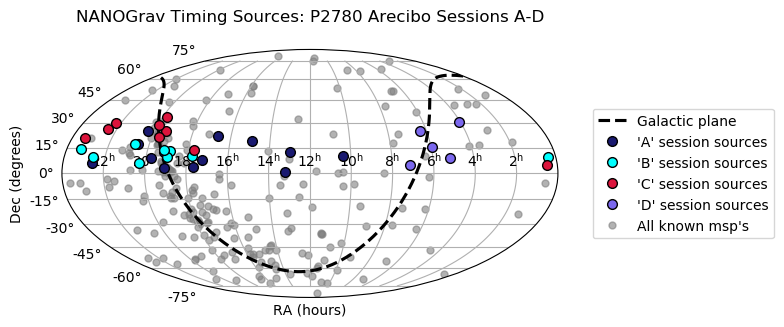

In [40]:
# create projection
ax = plt.subplot(111, projection='astro mollweide')
ax.grid()


# this makes text easier to see on dark colors 
#plot2.outline_text(ax)

# flip map
#h_upper_f = h_upper[flipid]

# plot map
#h_upper_smoothed = hp.smoothing(h_upper_f, 0.5)
#h_upper_smoothed = hp.smoothing(h_upper, 0.5)
#plot.healpix_heatmap(h_upper_smoothed)

#add labels
ax.set_xlabel("RA (hours)")
ax.set_ylabel("Dec (degrees)")


# add galactic plane
lon_array = np.arange(0,360)
lat = 0.
eq_array = np.zeros((360,2))
for lon in lon_array:
    ga = ephem.Galactic(np.radians(lon), np.radians(lat))
    eq = ephem.Equatorial(ga)
    eq_array[lon] = np.degrees(eq.get())
RA = eq_array[:,0]
RA = np.roll(RA,243) #use np.roll to avoid unwanted horizontal line with ax.plot
Dec = eq_array[:,1]
Dec = np.roll(Dec,243) #ditto

plot_mwd(RA, Dec)


# add pulsars
ax.plot(c_a.ra.radian,c_a.dec.radian,
            '.', color="midnightblue", markersize=14, mec='k', label="'A' session sources")
ax.plot(c_b.ra.radian,c_b.dec.radian, 
            '.', color="cyan", markersize=14, mec='k', label="'B' session sources")
ax.plot(c_c.ra.radian,c_c.dec.radian, 
            '.', color="crimson", markersize=14, mec='k', label="'C' session sources")
ax.plot(c_d.ra.radian,c_d.dec.radian, 
            '.', color="mediumslateblue", markersize=14, mec='k', label="'D' session sources")
ax.plot(c_msps.ra.radian,c_msps.dec.radian, 
            '.', color="grey", markersize=10, alpha=0.6, zorder=1, label="All known msp's")
#use zorder=1 to display points underneath grid lines

#add legend
leg = plt.legend(bbox_to_anchor=(1.07,0.5), loc="center left", borderaxespad=0)

plt.title('NANOGrav Timing Sources: P2780 Arecibo Sessions A-D', y=1.08)   #As of 12/2017
#plt.suptitle(r'95\% Characteristic Strain Upper Limit, $h_{95}$', y=0.05)
#plt.colorbar(orientation='horizontal', shrink=0.5)
plt.show()

#plt.savefig('/Users/Zach/Desktop/nanograv_plots/ao_nano_sessions_projection_12-2017.png')